In [2]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

Answer: ['measurement', 'station']

In [48]:
# Save references to each table
#save references to the classes named station and measurement.
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

Find the most recent date in the data set.

In [51]:

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Determine date 1 year prior to most recent date in the data set.

In [104]:
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

Design a query to retrieve the last 12 months of precipitation data and plot the results. 
Starting from the most recent data point in the database. 
Date range: 2016-08-23 - 2017-08-23


In [56]:
annual_precipitation=session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23').\
order_by(measurement.date).all()
annual_precipitation

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

Save the query results as a Pandas DataFrame. Explicitly set the column names

In [58]:
annual_precipitation_df=pd.DataFrame(annual_precipitation, columns=['date','prcp'])
#annual_precipitation_df.set_index('date',inplace=True)
annual_precipitation_df.set_index('date',inplace=False)
annual_precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


Sort the dataframe by date

In [105]:
annual_precipitation_df.sort_values(by='date')

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


Use Pandas Plotting with Matplotlib to plot the data

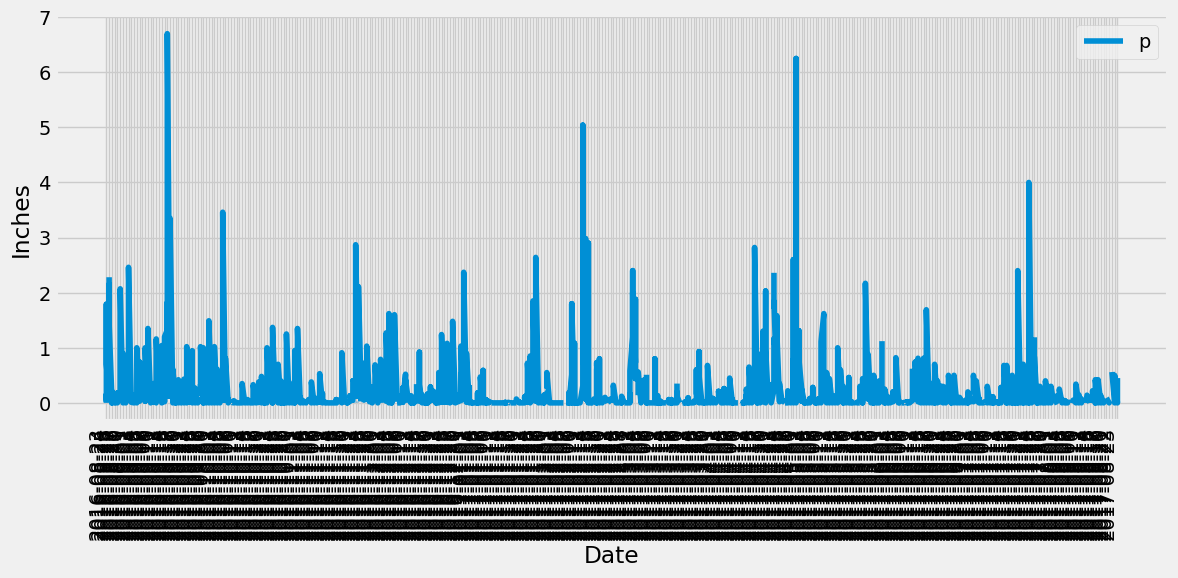

In [73]:
plt.figure(figsize=(12,6))
plt.plot(annual_precipitation_df ['date'], annual_precipitation_df['prcp'])
plt.xlabel('Date')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Inches')
plt.legend('precipitation')
plt.tight_layout()
plt.show()

Use Pandas to calculate the summary statistics for the precipitation data

In [106]:
annual_precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

Design a query to calculate the total number of stations in the dataset

In [81]:
no_locations = session.query(measurement).group_by(measurement.station).count()
no_locations

9

Design a query to find the most active stations (i.e. which stations have the most rows?)
List the stations and their counts in descending order.

In [103]:
most_active_stations =session.query(measurement.station, func.count(measurement.prcp)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [140]:
sel = [measurement.tobs, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
temp_data = session.query(*sel).\
filter(measurement.station =='USC00519281').all()

temp_data

[(85.0, 54.0, 85.0, 71.66378066378067)]

Using the most active station id
Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [139]:
temp_obs_data = session.query(measurement.tobs).\
    filter(measurement.station=='USC00519281').\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date.desc()).all()

temp_obs_data

[(79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (83.0,),
 (82.0,),
 (77.0,),
 (76.0,),
 (81.0,),
 (82.0,),
 (81.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (75.0,),
 (82.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (80.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (69.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (81.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (71.0,),
 (77.0,),
 (72.0,),
 (72.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (75.0,),
 (79.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (80.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (71.0,),
 (74.0,),
 (76.0,),
 (68.0,),
 (69.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (70.0,),
 (74.0,),
 (67.0,),
 (70.0,),
 (75.0,),
 (79.0,),
 (70.0,),
 (75.0,),
 (70.0,),
 (75.0,),


In [132]:
temp_obs_data_df = pd.DataFrame(temp_obs_data)
temp_obs_data_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


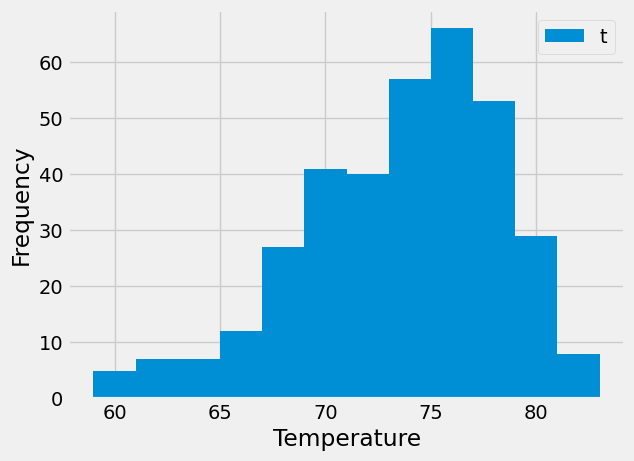

In [137]:
plt.hist(temp_obs_data_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()